In [1]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt
from autosklearn.metrics import mean_squared_error

X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=12
)

params = {
    'allow_string_features': False,
    'dask_client': None,
    'dataset_compression': False,
    'delete_tmp_folder_after_terminate': True,
    'disable_evaluator_output': False,
    'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
    'ensemble_kwargs': {'ensemble_size': 1},
    'ensemble_nbest': 50,
    'ensemble_size': None,
    'exclude': None,
    'get_smac_object_callback': None,
    'get_trials_callback': None,
    'include': {
        'regressor': [
            'adaboost',
            'ard_regression',
            'decision_tree',
            'extra_trees',
            'gaussian_process',
            'gradient_boosting',
            'k_nearest_neighbors',
            'liblinear_svr',
            'libsvm_svr',
            'mlp',
            'random_forest',
            'sgd'
        ],
        'feature_preprocessor': [
            'densifier',
            'extra_trees_preproc_for_regression',
            'fast_ica',
            'feature_agglomeration',
            'kernel_pca',
            'kitchen_sinks',
            'no_preprocessing',
            'nystroem_sampler',
            'pca',
            'polynomial',
            'random_trees_embedding',
            'select_percentile_regression',
            'select_rates_regression',
            'truncatedSVD'
        ]
    },
    'initial_configurations_via_metalearning': 25,
    'load_models': True,
    'logging_config': None,
    'max_models_on_disc': 50,
    'memory_limit': 3072,
    'metadata_directory': None,
    'metric': mean_squared_error,
    'n_jobs': -1,
    'per_run_time_limit': 20,
    'resampling_strategy': 'holdout',
    'resampling_strategy_arguments': {
        'train_size': 0.67,
        'shuffle': True,
        'folds': 5
    },
    'scoring_functions': None,
    'seed': 24,
    'smac_scenario_args': None,
    'time_left_for_this_task': 120,
    'tmp_folder': None
}

automl = autosklearn.regression.AutoSklearnRegressor(
    **params
)
automl.fit(X_train, y_train, X_test, y_test)

train_predictions = automl.predict(X_train)
print("Train MSE:", sklearn.metrics.mean_squared_error(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test MSE:", sklearn.metrics.mean_squared_error(y_test, test_predictions))

pot = automl.performance_over_time_

print(pot)

Train MSE: 2538.9398133179566
Test MSE: 3505.2626036319334
                    Timestamp  ensemble_optimization_score  \
10 2022-10-25 13:55:12.000000                          NaN   
17 2022-10-25 13:55:13.000000                          NaN   
1  2022-10-25 13:55:14.985937                  2596.166189   

    ensemble_test_score  single_best_optimization_score  \
10                  NaN                     6294.855087   
17                  NaN                     2596.166189   
1           3505.262604                     2596.166189   

    single_best_train_score  single_best_test_score  
10                 7.772237             5774.057974  
17              2510.456097             3505.262604  
1               2510.456097             3505.262604  


In [2]:
pot

,Timestamp,ensemble_optimization_score,ensemble_test_score,single_best_optimization_score,single_best_train_score,single_best_test_score
10,2022-10-25 13:55:12.000000,NaN,NaN,6294.855087,7.772237,5774.057974
17,2022-10-25 13:55:13.000000,NaN,NaN,2596.166189,2510.456097,3505.262604
1,2022-10-25 13:55:14.985937,2596.166189,3505.262604,2596.166189,2510.456097,3505.262604


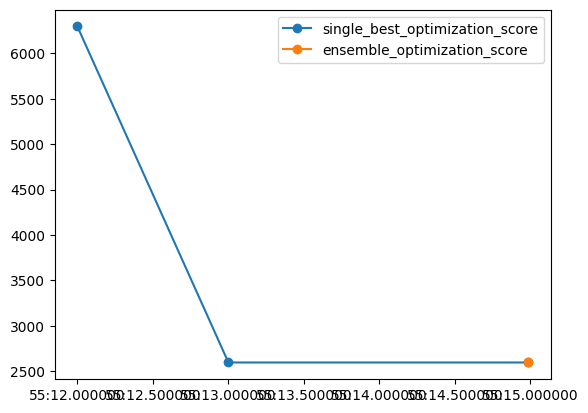

In [3]:
plt.plot(pot['Timestamp'], pot['single_best_optimization_score'], '-o', label = 'single_best_optimization_score')
plt.plot(pot['Timestamp'], pot['ensemble_optimization_score'], '-o', label = 'ensemble_optimization_score')
plt.legend()

In [4]:
automl.automl_._get_runhistory_models_performance()

,Timestamp,single_best_optimization_score,single_best_train_score,single_best_test_score
0,2022-10-25 13:55:19,2984.990804,457.026434,3811.443911
1,2022-10-25 13:55:12,6294.855087,7.772237,5774.057974
2,2022-10-25 13:55:13,2596.166189,2510.456097,3505.262604
3,2022-10-25 13:55:17,3454.196740,441.930266,3950.318060
4,2022-10-25 13:55:19,2959.695686,328.563252,3964.892830
5,2022-10-25 13:55:16,2936.861824,2816.548922,3378.612194
6,2022-10-25 13:55:25,2998.125821,2555.258767,3364.531382
7,2022-10-25 13:55:37,3090.191130,0.000000,4057.150130
8,2022-10-25 13:55:30,6294.855087,1.736711,5774.057974
9,2022-10-25 13:55:30,6294.855087,2.471302,5774.057974
